## Presentation
This is a simple ANN for handwritten digits recognition. The objective of this notebook is to understand and put some knowledge about deep learning into practice. Therefore it is an implementation by hand.

### References
1. [Neural Networks by 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
2. [How to Create a Neural Network by Sebastian League](https://www.youtube.com/watch?v=w8yWXqWQYmU&t=1147s)
3. [Building a neural network FROM SCRATCH by Samson Shang](https://www.youtube.com/watch?v=hfMk-kjRv4c)
4. [Human Compatible: Artificial Intelligence and the Problem of Control by Stuart Russel](https://www.amazon.com.br/Intelig%C3%AAncia-artificial-nosso-favor-tecnologia/dp/6559213080)
5. [Artificial Intelligence, a Modern Approach by Peter Norvig and Stuart Russel](https://drive.google.com/file/d/1vr9GXcYyN5jCwOZjMDfcbu3XESeBl3Cc/view)

### Author: Wagner Martins

In [135]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2

In [136]:
df = pd.read_csv("./mnist_test.csv")

##### First sample of an image from mnist dataset:

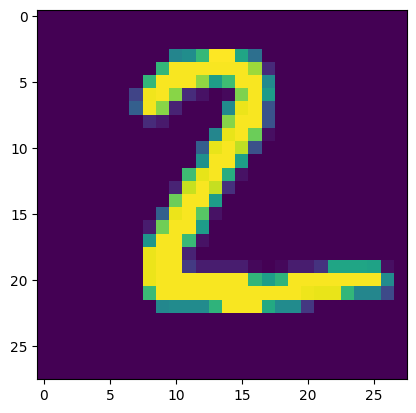

In [137]:
img_test = df.loc[0][1:].to_numpy()
img_test = img_test.reshape(28,28)
plt.imshow(img_test)

##### Selecting the first 2000 images for training

In [138]:
data = np.array(df)
m, n = data.shape
train = data[0:2000]

##### Presenting a sample image

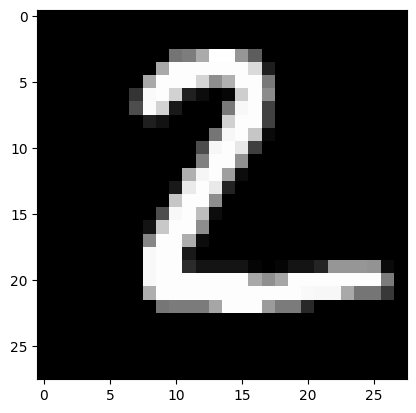

In [139]:
image = train[0]
image = np.delete(image, 0)
image = image.reshape(28,28)
plt.imshow(image, cmap='gray')

##### Preparing data and normalizing inputs

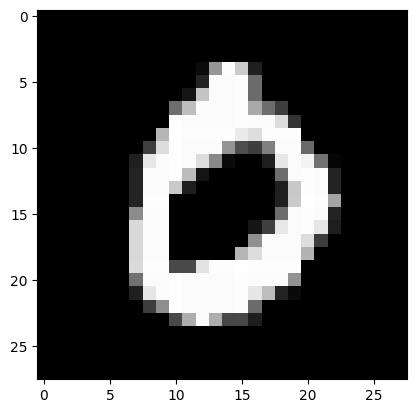

In [140]:
labels = train[:, 0]
pixels = train[:, 1:n]
pixels = pixels / 255.0
plt.imshow(pixels[2].reshape(28,28), cmap='gray')

##### Rage against the machine

In [141]:
def ReLU(x):
  return np.maximum(0,x)

def ddxReLU(x):
  return x > 0

def softmax(X):
  return np.exp(X) / sum(np.exp(X))

def onehot(labels):
  onh = np.zeros((labels.size, 10))
  onh[np.arange(labels.size), labels] = 1
  return onh.T

def init_params():
  W1 = np.random.random((10, 784)) - 0.5
  b1 = np.random.random((10,1)) - 0.5
  W2 = np.random.random((10, 10)) - 0.5
  b2 = np.random.random((10,1)) - 0.5
  return W1, b1, W2, b2

# some transposing is needed, so that the matrix multiplication matches the
# correct result for each neuron and 784 pixels
def forward_prop(W1, b1, W2, b2, pixels):
  Z1 = W1.dot(pixels)+b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1)+b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def back_prop(Z1, A1, Z2, A2, W2, labels, pixels):
  onh = onehot(labels)
  dz2 = 2*(A2 - onh)
  dw2 = 1/labels.size * dz2.dot(A1.T)
  db2 = 1/labels.size * np.sum(dz2)
  dz1 = W2.T.dot(dz2) * ddxReLU(Z1)
  dw1 = 1/labels.size * dz1.dot(pixels.T)
  db1 = 1/labels.size * np.sum(dz1)

  return dw1, db1, dw2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

def prediction(A2):
  return np.argmax(A2, 0)

def acc(predictions, label):
  return np.sum(predictions == label) / label.size

def gradient_descent(Lb, Px, it, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(it):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, Px)
    dw1, db1, dw2, db2 = back_prop(Z1, A1, Z2, A2, W2, Lb, Px)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dw1, db1, dw2, db2, alpha)
    if i%10 == 0:
      print("Accuracy: ", acc(prediction(A2), Lb))
  return W1, b1, W2, b2

In [142]:
W1, b1, W2, b2 = gradient_descent(labels, pixels.T, 500, 0.1)

Accuracy:  0.091
Accuracy:  0.2475
Accuracy:  0.3705
Accuracy:  0.4865
Accuracy:  0.5575
Accuracy:  0.6055
Accuracy:  0.651
Accuracy:  0.6815
Accuracy:  0.715
Accuracy:  0.7335
Accuracy:  0.7605
Accuracy:  0.777
Accuracy:  0.7945
Accuracy:  0.8065
Accuracy:  0.8105
Accuracy:  0.821
Accuracy:  0.8285
Accuracy:  0.8425
Accuracy:  0.85
Accuracy:  0.8565
Accuracy:  0.861
Accuracy:  0.865
Accuracy:  0.8685
Accuracy:  0.871
Accuracy:  0.8755
Accuracy:  0.88
Accuracy:  0.8825
Accuracy:  0.8865
Accuracy:  0.8885
Accuracy:  0.8905
Accuracy:  0.892
Accuracy:  0.8955
Accuracy:  0.9015
Accuracy:  0.9025
Accuracy:  0.9055
Accuracy:  0.9075
Accuracy:  0.911
Accuracy:  0.9145
Accuracy:  0.917
Accuracy:  0.919
Accuracy:  0.9205
Accuracy:  0.9215
Accuracy:  0.9235
Accuracy:  0.926
Accuracy:  0.9275
Accuracy:  0.9305
Accuracy:  0.931
Accuracy:  0.9335
Accuracy:  0.9345
Accuracy:  0.935


##### Useful  functions

In [143]:
# notice it needs to be in np.array([]) followed by brackets in order to make
# the array of its correspondent matrix form
# custom_test = data[1001]
# custom_img = np.array([custom_test[1:n]])

def make_prediction(W1, b1, W2, b2, custom_img):
  # make_prediction() automatically transposes and divides it by 255, so that
  # any raw image in 784 array format is allowed
  custom_img = custom_img/255.0
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, custom_img.T)
  return prediction(A2)[0]

def print_image(img):
  # prints any given 784 array image
  img = img.reshape(28,28)
  plt.imshow(img, cmap='gray')
  plt.show()

def get_training_img(index):
  return np.array([data[index][1:n]])

##### Guessing images

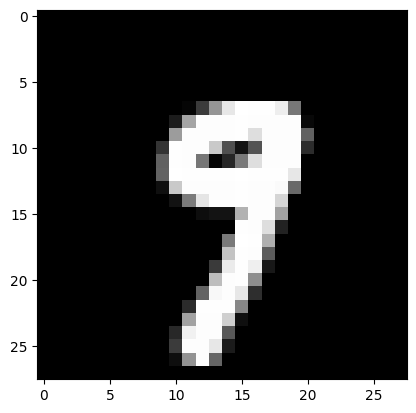

Guess: 9


In [152]:
ind = 8001
print_image(get_training_img(ind))
print("Guess:", make_prediction(W1,b1,W2,b2, get_training_img(ind)))

##### Creating an own file

In [145]:
img = cv2.imread('./Untitled.jpeg', cv2.IMREAD_GRAYSCALE)
img = img.reshape(1,784)
print("Guess:", make_prediction(W1, b1, W2, b2, img))

Guess: 7
